## Exploratory Data Analysis on Film Industry: Genres, Popularity and Profitability

By analyzing the following aspects of movie datasets, we can provide actionable insights to the head of Microsoft's new movie studio, guiding their decision-making process in terms of film genres, budget allocation and release timing. These insights can help them develop a strategic plan to create successful movies and compete effectively in the film industry.


![images (1)](https://github.com/mwanza00/microsoft_movies/assets/137791910/3aeb84a7-e7c9-4c4c-b668-470fdc639383)

## Movies dataset 1

# Does release date affect revenue?

In [1]:
# Importing the relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the movie budget data into a DataFrame
movie_budgets_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

# Exploring the structure and content of the DataFrame:
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [3]:
# Inspecting the shape
movie_budgets_df.shape

(5782, 6)

In [4]:
# Looking at the info printout
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [5]:
# Cheking whether there are missing values
movie_budgets_df.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [6]:
# Cheking for duplicates
movie_budgets_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5777    False
5778    False
5779    False
5780    False
5781    False
Length: 5782, dtype: bool

In [7]:
# Data processing
# Converting the release date column to a datetime format
movie_budgets_df['release_date'] = pd.to_datetime(movie_budgets_df['release_date'])

# Converting columns to numeric types
movie_budgets_df['domestic_gross'] = pd.to_numeric(movie_budgets_df['domestic_gross'].str.replace(',', '').str.replace('$', ''))
movie_budgets_df['worldwide_gross'] = pd.to_numeric(movie_budgets_df['worldwide_gross'].str.replace(',', '').str.replace('$', ''))

# Checking the updated data types
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   object        
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 271.2+ KB


In [8]:
# Extracting the release month from the release date
movie_budgets_df['release_month'] = movie_budgets_df['release_date'].dt.month

# Group the data by release month and calculate the mean domestic gross and worldwide gross
grouped_data = movie_budgets_df.groupby('release_month').agg({
    'domestic_gross': 'mean',
    'worldwide_gross': 'mean'
}).reset_index()
grouped_data

,release_month,domestic_gross,worldwide_gross
0,1,2.394962e+07,4.656382e+07
1,2,3.541465e+07,7.154453e+07
2,3,3.857299e+07,8.063337e+07
3,4,2.732840e+07,5.992026e+07
4,5,6.669795e+07,1.622680e+08
5,6,6.582791e+07,1.425230e+08
6,7,6.072804e+07,1.409636e+08
7,8,3.216821e+07,6.097841e+07
8,9,2.314989e+07,4.669369e+07
9,10,2.442350e+07,4.946456e+07


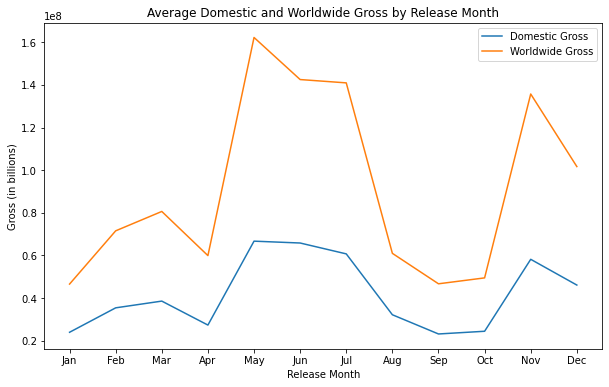

In [9]:
# Plotting the results
plt.figure(figsize=(10, 6))
sns.lineplot(x='release_month', y='domestic_gross', data=grouped_data, label='Domestic Gross')
sns.lineplot(x='release_month', y='worldwide_gross', data=grouped_data, label='Worldwide Gross')
plt.xlabel('Release Month')
plt.ylabel('Gross (in billions)')
plt.title('Average Domestic and Worldwide Gross by Release Month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.show()

From the analysis, I have observed that the release month of a movie affects revenue. Movies released in May tend to generate the most revenue while movies released in September tend to generate the least revenue. Microsoft should take note of this and consider producing movies during the most favorable months or seasons for releasing films in order to maximize revenue production. Films  released in May tend to have higher box office success and therefore perform better financially. These are the months of the year that Microsoft's new movie studio should consider producing new movies.

## Are budget and revenue correlated?

In [10]:
# Reading the movie budget data into a DataFrame
movie_budgets_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

# Exploring the structure and content of the DataFrame:
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [11]:
# Looking at the info printout
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [12]:
# Data processing
# Convert the gross columns to numeric values (removing commas and dollar signs)
movie_budgets_df['domestic_gross'] = pd.to_numeric(movie_budgets_df['domestic_gross'].str.replace(',', '').str.replace('$', ''))
movie_budgets_df['worldwide_gross'] = pd.to_numeric(movie_budgets_df['worldwide_gross'].str.replace(',', '').str.replace('$', ''))

# Convert the production budget column to numeric values (removing commas and dollar signs)
movie_budgets_df['production_budget'] = pd.to_numeric(movie_budgets_df['production_budget'].str.replace(',', '').str.replace('$', ''))

# Checking the updated data types
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


In [13]:
# Calculate the correlation coefficients
domestic_correlation = movie_budgets_df['production_budget'].corr(movie_budgets_df['domestic_gross'])
worldwide_correlation = movie_budgets_df['production_budget'].corr(movie_budgets_df['worldwide_gross'])

# Print the correlation coefficient
print(f"The correlation coefficient between production budget and domestic revenue is: {domestic_correlation}")
print(f"The correlation coefficient between production budget and worldwide revenue is: {worldwide_correlation}")

The correlation coefficient between production budget and domestic revenue is: 0.6856818396752732
The correlation coefficient between production budget and worldwide revenue is: 0.7483059765694758


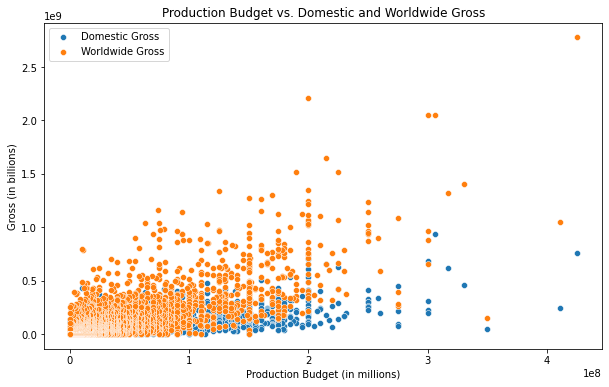

In [14]:
# Plotting the scatter plot to visualize the correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='production_budget', y='domestic_gross', data=movie_budgets_df, label='Domestic Gross')
sns.scatterplot(x='production_budget', y='worldwide_gross', data=movie_budgets_df, label='Worldwide Gross')
plt.xlabel('Production Budget (in millions)')
plt.ylabel('Gross (in billions)')
plt.title('Production Budget vs. Domestic and Worldwide Gross')
plt.legend()
plt.show()

The correlation coefficient between budget and worldwide gross is 0.748, indicating a moderate to strong positive correlation between production budget and revenue. This means that as the budget of a movie increases, there is a tendency for its revenue to increase as well. In other words, higher-budget movies tend to generate higher revenue on average. However, it's important to note that correlation does not imply causation, and there may still be significant variability in revenue that is not accounted for by the budget alone. While there is a positive relationship between budget and revenue, other factors may also influence revenue generation, such as marketing, genre, star power, and release timing.

## Movies dataset 2

# Which movie genres are crowd favourites?

In [15]:
# Reading the dataset
tmdb_movies_df = pd.read_csv('zippedData/tmdb.movies.csv.gz', index_col=0)
tmdb_movies_df

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [16]:
# Inspecting the shape
tmdb_movies_df.shape

(26517, 9)

In [17]:
# # Looking at the info printout
tmdb_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [18]:
# Cheking whether there are missing values
tmdb_movies_df.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [19]:
# Cheking for duplicates
tmdb_movies_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
26512    False
26513    False
26514    False
26515    False
26516    False
Length: 26517, dtype: bool

In [20]:
# Data processing
# Grouping the data by genre and calculating the mean popularity for each genre
genre_popularity = tmdb_movies_df.groupby('genre_ids')['popularity'].mean()

# Sorting the genres based on popularity in descending order
sorted_genres = genre_popularity.sort_values(ascending=False)
sorted_genres

genre_ids
[28, 12, 16, 878, 35]              60.534
[10751, 16, 35, 14, 12]            48.057
[28, 12, 878, 35]                  44.729
[28, 9648, 878, 53]                36.955
[12, 10751, 16, 28, 35]            36.920
                                    ...  
[16, 10749, 99]                     0.600
[9648, 28, 53]                      0.600
[28, 12, 35, 80, 18, 10402, 37]     0.600
[28, 12, 35, 10749]                 0.600
[878, 80]                           0.600
Name: popularity, Length: 2477, dtype: float64

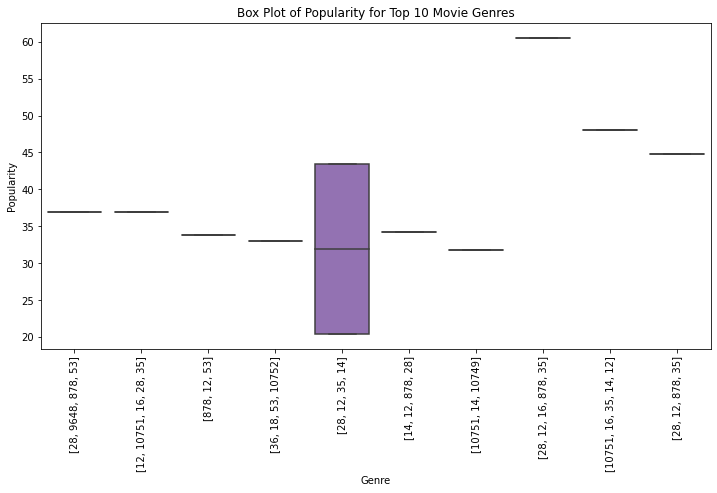

In [21]:
# Selecting the top 10 most popular genres
top_genres = sorted_genres.head(10)

# Filtering the original dataset to include only the top genres
top_genres_df = tmdb_movies_df[tmdb_movies_df['genre_ids'].isin(top_genres.index)]

# Plotting the results in a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='genre_ids', y='popularity', data=top_genres_df)
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.title('Box Plot of Popularity for Top 10 Movie Genres')
plt.xticks(rotation=90)
plt.show()

The most popular movie genre is the movie genre_id [28,12,35,14]. Microsoft can create movies from the most successful genres since these genres have been consistently popular over recent years. These genres have a high potential for success therefore leading to high box office revenue.

# Does production month affect popularity of a genre?

In [22]:
# Loading the dataset
tmdb_movies_df = pd.read_csv('zippedData/tmdb.movies.csv.gz')

# Exploring the structure and content of the DataFrame:
tmdb_movies_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [23]:
# # Looking at the info printout
tmdb_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [24]:
# Data processing
# Convert the release_date column to a datetime format
tmdb_movies_df['release_date'] = pd.to_datetime(tmdb_movies_df['release_date'])


# Checking the updated data types
tmdb_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         26517 non-null  int64         
 1   genre_ids          26517 non-null  object        
 2   id                 26517 non-null  int64         
 3   original_language  26517 non-null  object        
 4   original_title     26517 non-null  object        
 5   popularity         26517 non-null  float64       
 6   release_date       26517 non-null  datetime64[ns]
 7   title              26517 non-null  object        
 8   vote_average       26517 non-null  float64       
 9   vote_count         26517 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 2.0+ MB


In [25]:
# Extracting the production month from the release date
tmdb_movies_df['production_month'] = tmdb_movies_df['release_date'].dt.month

# Group the data by production month and genre and calculate the mean popularity
grouped_data = tmdb_movies_df.groupby(['production_month', 'genre_ids'])['popularity'].mean().reset_index()
grouped_data

,production_month,genre_ids,popularity
0,1,"[10402, 10751]",0.904000
1,1,"[10402, 12, 35, 14, 878]",1.820000
2,1,"[10402, 16, 10751, 14]",6.937000
3,1,"[10402, 18]",0.600000
4,1,"[10402, 27]",1.000000
...,...,...,...
5894,12,"[99, 80, 36]",0.840000
5895,12,"[99, 9648, 10749, 878]",0.801000
5896,12,"[99, 9648]",0.600000
5897,12,[99],1.190652


In [26]:
# Find the top genre for each production month based on average popularity
top_genre_per_month = grouped_data.loc[grouped_data.groupby('production_month')['popularity'].idxmax()]
top_genre_per_month

,production_month,genre_ids,popularity
9,1,"[10749, 10751, 16, 14]",26.701
882,2,"[53, 28, 80]",45.253
1269,3,"[28, 18, 878]",45.000
1567,4,"[12, 28, 14]",80.773
2231,5,"[28, 12, 14, 878]",41.867
2693,6,"[28, 12, 16, 10751]",36.286
3147,7,"[28, 12, 878, 35]",44.729
3628,8,"[28, 878, 12]",49.606
4110,9,"[28, 9648, 878, 53]",36.955
4821,10,"[878, 28, 53]",48.571


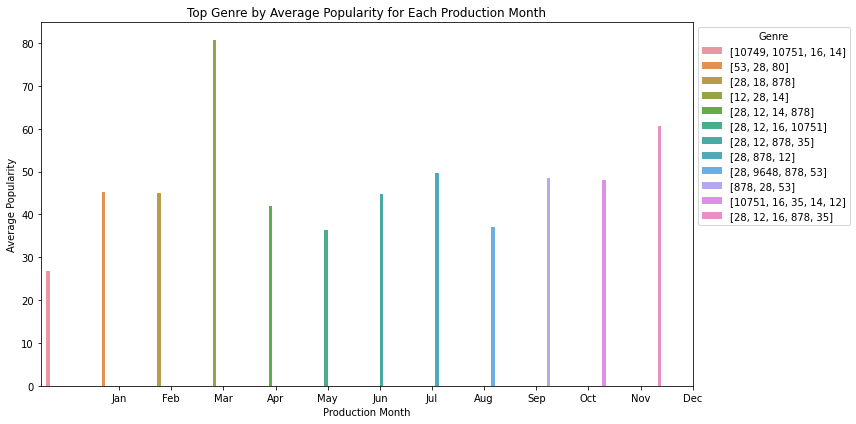

In [27]:
# Plotting the results
plt.figure(figsize=(12, 6))
sns.barplot(x='production_month', y='popularity', hue='genre_ids', data=top_genre_per_month)
plt.xlabel('Production Month')
plt.ylabel('Average Popularity')
plt.title('Top Genre by Average Popularity for Each Production Month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Genre', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

There is a positive correlation coefficient between popularity and release month for each specific movie genre_id. Apart from audience preferences and popularity, another thing that Microsoft should take into account when producing different genres of movies is the release date. They should consider producing movies for each genre during the most favorable months or seasons for releasing films in that genre.

# Does popularity affect vote average?

In [28]:
# Reading the dataset
tmdb_movies_df = pd.read_csv('zippedData/tmdb.movies.csv.gz')

# Exploring the structure and content of the DataFrame:
tmdb_movies_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [29]:
# Looking at the info printout
tmdb_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [30]:
# Calculate the correlation coefficient between popularity and vote_average
correlation = tmdb_movies_df['popularity'].corr(tmdb_movies_df['vote_average'])

# Print the correlation coefficient
print(f"The correlation coefficient between popularity and vote_average is: {correlation}")

The correlation coefficient between popularity and vote_average is: 0.06527330770988117


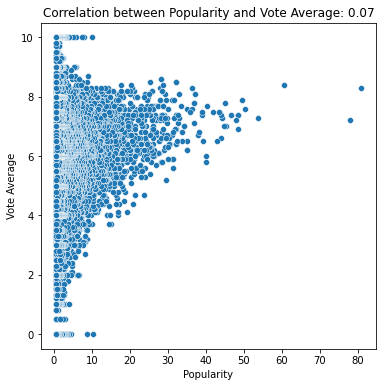

In [31]:
# Plotting the results
plt.figure(figsize=(6, 6))
sns.scatterplot(x='popularity', y='vote_average', data=tmdb_movies_df)
plt.xlabel('Popularity')
plt.ylabel('Vote Average')
plt.title(f'Correlation between Popularity and Vote Average: {correlation:.2f}')
plt.show()

The positive correlation between a film's popularity as measured by user votes indicates that there is a tendency for the popularity and vote_average to increase together. Films with higher popularity or better ratings tend to have higher box office success and therefore perform better financially. These are the type of films that the Microsoft's new movie studio should consider producing in order to maximize revenue production.

## Recommendations

Based on the visualized data, the recommended route for Microsoft's new movie studio is to focus on producing films with high popularity or better ratings since they tend to have a high potential for success and perform better financially. They are the most successful genres in terms of box office revenue. Microsoft's new movie studio should produce movies during the most favorable months or seasons for releasing films, taking into account competition and audience preferences. The studio should also produce movies within higher budget ranges since they have shown the highest returns on investment.